**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Dataset (Iris example)**

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

**Normalize Features**

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**KNN Model & Experiment with Different k**

In [5]:
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nK={k} | Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))


K=3 | Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=5 | Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=7 | Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Final Model & Evaluation**

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualize Decision Boundaries (only for 2D features)**

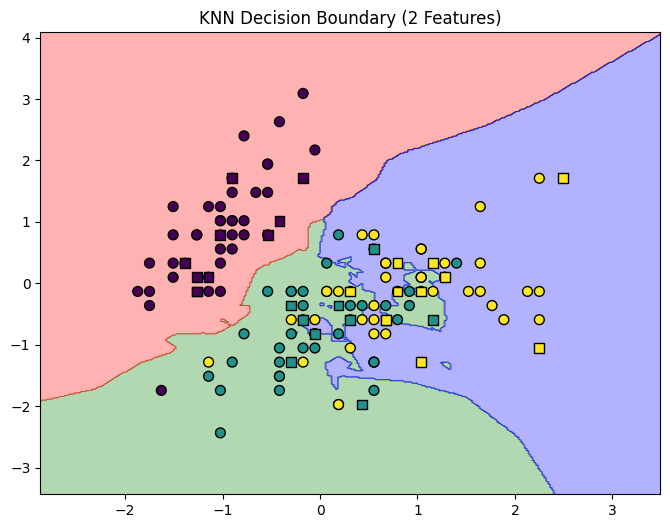

In [7]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # taking only first 2 features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k', marker='o', s=50)
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor='k', marker='s', s=50)
plt.title("KNN Decision Boundary (2 Features)")
plt.show()